# Multiclass Classification
In this type of classification there are more than 2 unique labels.

In [54]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [55]:
# Data Creation
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, Y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

In [56]:
# Convert the data to tensors
X_blob = torch.from_numpy(X_blob).type(torch.float32)
Y_blob = torch.from_numpy(Y_blob).type(torch.LongTensor)

X_blob[:5],Y_blob[:5]

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815]]),
 tensor([3, 2, 2, 1, 1]))

In [57]:
# Train Test Split
X_Train,X_Test,Y_train,Y_Test = train_test_split(X_blob,Y_blob,test_size=0.2)

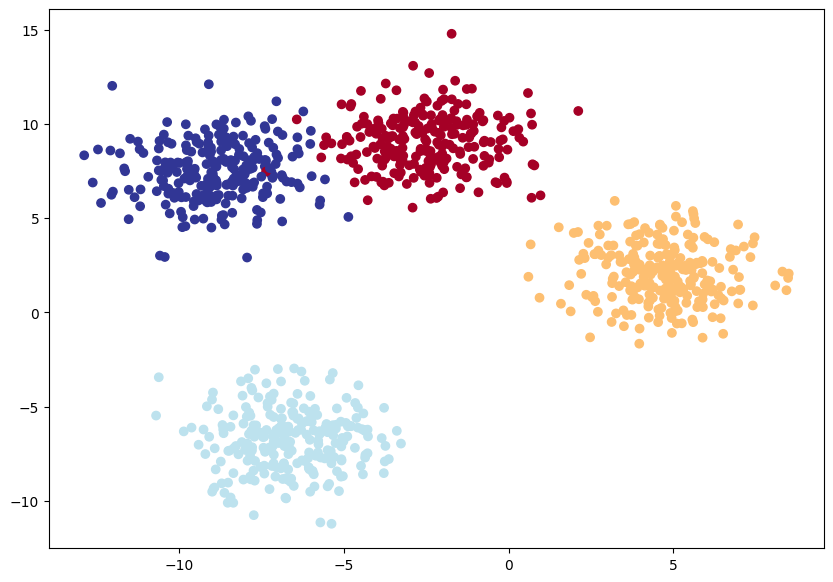

In [58]:
# Plot the data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=Y_blob, cmap=plt.cm.RdYlBu)

In [59]:
# Create model
from torch import nn
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=2, out_features=8),
            nn.ReLU(),
            nn.Linear(in_features=8, out_features=4),
        )
    def forward(self, x):
        return self.linear_layer_stack(x)

In [60]:
# Accuracy Score calculator function
def accuracy_score(Y_True,prediction):
    correct = torch.eq(Y_True,prediction).sum()
    accuracy =(correct / len(Y_True))*100
    return accuracy

In [61]:
# Initialize model
model = Model()
model

Model(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [62]:
# Define Loss and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr=0.001)

In [63]:
# Training and Testing Loop
torch.manual_seed(42)

# Set Epochs
epochs = 1000

for epoch in range(epochs):
    #Training.....
    model.train()
    train_logits = model(X_Train).squeeze()
    train_predictions = torch.softmax(train_logits, dim=1).argmax(dim=1)

    train_loss = loss_fn(train_logits, Y_train)
    train_acc = accuracy_score(Y_train,train_predictions)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_Test).squeeze().type(torch.float32)
        test_prediction  = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits, Y_Test)
        test_acc = accuracy_score(Y_Test,test_prediction)

        if epoch % 100 == 0 or epoch  == 999 or epoch == 0:
            print(f'|Epoch  {epoch} |\n| Training Loss { train_loss: .5f} |\n| Accuracy {train_acc:.3f}% |\n| Test Loss {test_loss:.5f} |\n| Test Accuracy {test_acc:.3f}% | \n')

|Epoch  0 |
| Training Loss  3.38458 |
| Accuracy 51.000% |
| Test Loss 3.65726 |
| Test Accuracy 45.000% | 

|Epoch  100 |
| Training Loss  1.52066 |
| Accuracy 47.500% |
| Test Loss 1.57745 |
| Test Accuracy 41.500% | 

|Epoch  200 |
| Training Loss  0.62922 |
| Accuracy 76.875% |
| Test Loss 0.64808 |
| Test Accuracy 74.500% | 

|Epoch  300 |
| Training Loss  0.30272 |
| Accuracy 98.000% |
| Test Loss 0.31938 |
| Test Accuracy 98.000% | 

|Epoch  400 |
| Training Loss  0.17631 |
| Accuracy 99.375% |
| Test Loss 0.18552 |
| Test Accuracy 98.500% | 

|Epoch  500 |
| Training Loss  0.11978 |
| Accuracy 99.250% |
| Test Loss 0.12433 |
| Test Accuracy 99.000% | 

|Epoch  600 |
| Training Loss  0.08966 |
| Accuracy 99.250% |
| Test Loss 0.09151 |
| Test Accuracy 99.000% | 

|Epoch  700 |
| Training Loss  0.07147 |
| Accuracy 99.250% |
| Test Loss 0.07171 |
| Test Accuracy 99.000% | 

|Epoch  800 |
| Training Loss  0.05952 |
| Accuracy 99.250% |
| Test Loss 0.05883 |
| Test Accuracy 99.000

In [64]:
# Export model file
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path(r'model')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "Blob Multiclass classification model pytoch.pth"
torch.save(model.state_dict(), str(MODEL_PATH / MODEL_NAME))
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: model\Blob Multiclass classification model pytoch.pth
